In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
import seaborn as sns


In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.shape

(284807, 31)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
data = data.drop(['Time'],axis=1)

In [13]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
data.shape

(284807, 30)

In [15]:
data.duplicated().any()

True

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(275663, 30)

In [18]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

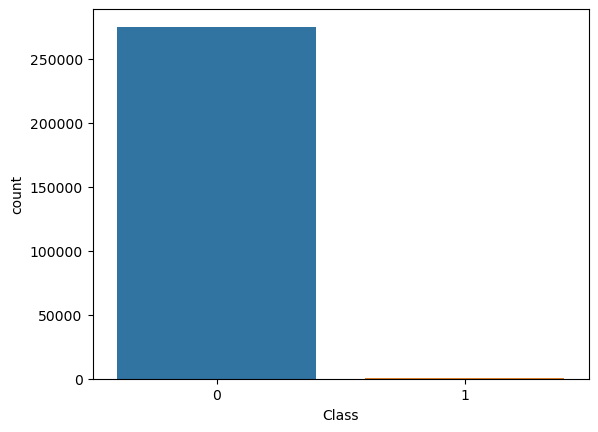

In [19]:
sns.countplot( x='Class', data =data)

In [20]:
legit = data[data.Class==0]
fraud = data[data['Class']==1]

In [21]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 473, dtype: int64

In [22]:
legit.Amount.describe()

count    275190.000000
mean          0.008682
std           1.012309
min          -0.353229
25%          -0.327682
50%          -0.258275
75%          -0.033782
max         102.362243
Name: Amount, dtype: float64

In [23]:
fraud.Amount.describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [24]:
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,...,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,0.008682
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


In [25]:
legit.shape

(275190, 30)

In [26]:
fraud.shape

(473, 30)

In [27]:
legit_sample = legit.sample(n=473)

In [28]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [29]:
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132621,-4.132634,-5.540530,1.770575,-1.069854,1.773788,-2.674961,-2.373283,0.135836,-1.699103,1.100778,...,0.209073,0.311891,0.673812,0.402481,0.084763,-0.248293,-0.230948,0.866124,0.634298,0
215244,1.846449,-1.004625,0.524247,0.559027,-1.358420,0.696609,-1.525727,0.473635,2.028158,-0.017939,...,0.171867,0.797382,0.148605,-0.347278,-0.479245,0.583656,0.024581,-0.046040,-0.237285,0
78679,0.781723,-0.707534,1.029344,1.796861,-1.086634,0.166213,-0.223078,0.095629,1.302613,-0.511210,...,-0.334512,-0.923483,-0.105598,0.397181,0.439322,-0.573910,0.042292,0.063078,0.404608,0
142118,-0.513449,0.298099,2.569435,-1.030190,-0.446983,-0.572566,0.212633,-0.184667,1.036682,-1.260348,...,0.013700,0.426295,-0.355167,0.431063,0.327450,-0.584216,-0.011010,-0.128728,-0.349231,0
158374,1.945892,-0.364427,-0.467087,0.414335,-0.333068,-0.217373,-0.529251,-0.100541,2.299989,-0.399070,...,-0.404903,-0.952619,0.424708,0.505759,-0.639334,0.165512,-0.079455,-0.037038,-0.141411,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [30]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [31]:
new_df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.01361,0.000520,-0.001594,-0.076341,0.098000,0.002674,0.053936,-0.050366,0.016001,-0.040075,...,0.052965,0.009475,0.025881,0.024919,-0.036027,0.000614,-0.013341,-0.036259,-0.01826,0.000744
1,-4.49828,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.07827,0.142021


In [32]:
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=142)

In [34]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred1 = log.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred1)

0.9368421052631579

In [37]:
precision_score(y_test,y_pred1)

0.9560439560439561

In [38]:
recall_score(y_test,y_pred1)

0.9157894736842105

In [39]:
f1_score(y_test,y_pred1)

0.935483870967742

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred2 = dt.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred2)

0.8894736842105263

In [43]:
precision_score(y_test,y_pred2)

0.8775510204081632

In [44]:
recall_score(y_test,y_pred2)

0.9052631578947369

In [45]:
f1_score(y_test,y_pred2)

0.8911917098445595

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred3 = rf.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred3)

0.9315789473684211

In [49]:
precision_score(y_test,y_pred3)

0.9659090909090909

In [50]:
recall_score(y_test,y_pred3)

0.8947368421052632

In [51]:
f1_score(y_test,y_pred3)

0.9289617486338798

In [52]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [53]:
final_data

,Models,ACC
0,LR,93.684211
1,DT,88.947368
2,RF,93.157895


<Axes: xlabel='Models', ylabel='ACC'>

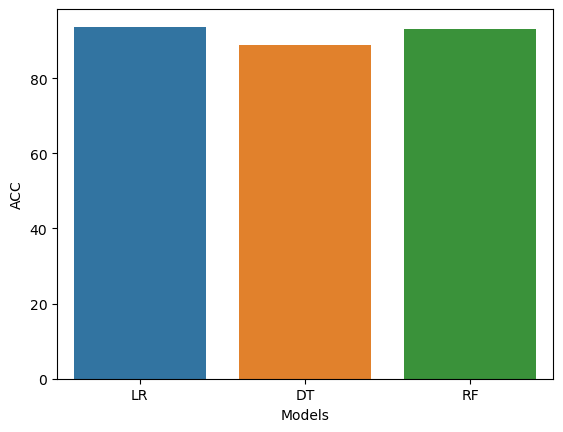

In [54]:
sns.barplot(x = 'Models', y = 'ACC', data = final_data)

In [55]:
X = data.drop('Class',axis=1)
y = data['Class']

In [56]:
X.shape

(275663, 29)

In [57]:
y.shape

(275663,)

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [60]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [62]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred1 = log.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred1)

0.9446473345688433

In [65]:
precision_score(y_test,y_pred1)

0.9726699911090494

In [66]:
recall_score(y_test,y_pred1)

0.914931912804756

In [67]:
f1_score(y_test,y_pred1)

0.9429179040855903

In [69]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred2 = dt.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred2)

0.9981467349831026

In [72]:
precision_score(y_test,y_pred2)

0.9971152276067275

In [73]:
recall_score(y_test,y_pred2)

0.9991818628074832

In [74]:
f1_score(y_test,y_pred2)

0.9981474754812931

In [75]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_pred3 = rf.predict(X_test)
                     

In [77]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [78]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [79]:
recall_score(y_test,y_pred3)

1.0

In [80]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [81]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [82]:
final_data

,Models,ACC
0,LR,94.464733
1,DT,99.814673
2,RF,99.991824


<Axes: xlabel='Models', ylabel='ACC'>

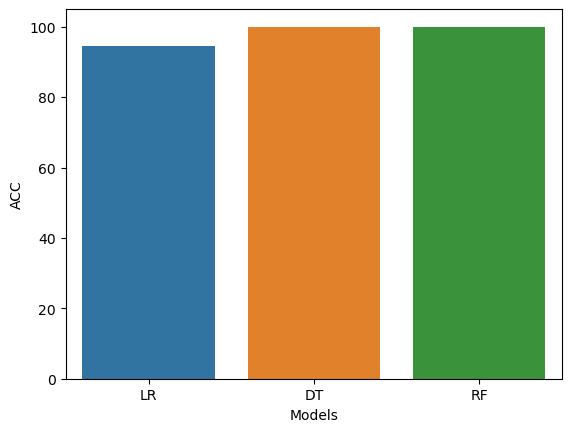

In [83]:
sns.barplot(x = 'Models', y = 'ACC', data = final_data)

In [84]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [87]:
import joblib

In [88]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [89]:
model = joblib.load("credit_card_model")